In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("final_data.csv").dropna()


X=df.iloc[:,:3]
y = df.iloc[:,3]

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=20251025)

param = {
    "max_depth": range(1,20)
}

model = DecisionTreeClassifier(random_state=20251025)

gs_tree = GridSearchCV(model,
                       param_grid=param,
                       scoring="accuracy",
                       cv=5)

gs_tree.fit(X_train,y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

model.set_params(max_depth=8)

model.fit(X_train,y_train)

display(model.score(X_test, y_test))

display(model.predict([(188, 216, 7)]))

display(model.get_depth())

{'max_depth': 8}

0.9123979213066072

0.8328387734915925

0.8328387734915925

c:\Users\sptho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Green'], dtype=object)

8

[[0.36464771 0.37252475 0.3799505  0.38366337 0.37747525]
 [0.54017305 0.52846535 0.53589109 0.54331683 0.54826733]
 [0.58714462 0.61014851 0.58415842 0.60148515 0.61138614]
 [0.66749073 0.71905941 0.66831683 0.69678218 0.70173267]
 [0.76019778 0.76485149 0.75866337 0.78217822 0.77722772]
 [0.78491965 0.80940594 0.79826733 0.7970297  0.79455446]
 [0.80840544 0.81188119 0.81559406 0.80816832 0.81435644]
 [0.83559951 0.8230198  0.82673267 0.82178218 0.81930693]
 [0.82323857 0.84777228 0.83044554 0.80569307 0.80693069]
 [0.81211372 0.83910891 0.82425743 0.81311881 0.79950495]
 [0.81458591 0.83292079 0.82178218 0.80569307 0.7970297 ]
 [0.81211372 0.8230198  0.81930693 0.80569307 0.79950495]
 [0.80469716 0.82178218 0.81683168 0.80074257 0.80445545]
 [0.81458591 0.81806931 0.82920792 0.80445545 0.8019802 ]
 [0.81458591 0.82425743 0.82178218 0.80445545 0.79950495]
 [0.81458591 0.82054455 0.82054455 0.80445545 0.7970297 ]
 [0.81458591 0.81930693 0.82054455 0.80445545 0.79579208]
 [0.81458591 0

array([0.37837169, 0.55035882, 0.60900767, 0.7003217 , 0.79312051,
       0.8359317 , 0.87428854, 0.91239792, 0.93739173, 0.96164316,
       0.97921307, 0.98911161, 0.99505073, 0.99826776, 0.99925761,
       1.        , 1.        , 1.        , 1.        ])

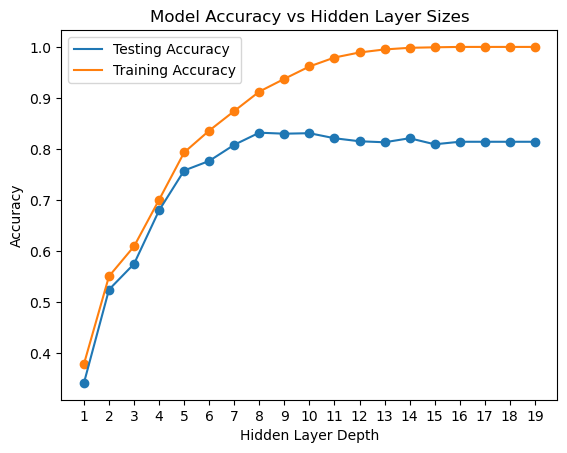

In [91]:
layer_sizes_values = range(1,20)

# Use this to store our results
scores = np.ones((len(layer_sizes_values), 5))
train_scores = np.ones(len(layer_sizes_values))
test_scores = np.ones(len(layer_sizes_values))


for (i,max_depth_candidate) in enumerate(layer_sizes_values):
    model = DecisionTreeClassifier(max_depth=(max_depth_candidate), random_state=20250324);
    current_score = cross_val_score(model, X_train, y_train, cv=5);
    scores[i] = current_score;
    model.fit(X_train,y_train)
    train_scores[i] = model.score(X_train,y_train)
    test_scores[i] = model.score(X_test,y_test)
print(scores)

plt.plot(layer_sizes_values,test_scores, label="Testing Accuracy")
plt.plot(layer_sizes_values,train_scores, label="Training Accuracy")
plt.scatter(layer_sizes_values,test_scores)
plt.scatter(layer_sizes_values,train_scores)
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Depth")
plt.xticks(layer_sizes_values)
plt.title("Model Accuracy vs Hidden Layer Sizes")
plt.legend();
display(train_scores)

In [21]:
from PIL import Image

img = Image.open("colors.jpg")

pix = img.load()

h, w = img.size

display(pix[25,60])


(188, 216, 7)

In [79]:
# val = pix[0,0]

# val = "{:02x}{:02x}{:02x}".format(val[0],val[1],val[2])

# display(val)

# model.predict([[int(val,16)]])
display(pix[25,60])
model.predict([pix[25,60]])

(188, 216, 7)

c:\Users\sptho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Green'], dtype=object)

In [80]:
n = 0
avgR = 0
avgG = 0
avgB = 0
for i in range(h):
    for j in range(w):
        val = pix[i,j]
        avgR += val[0]
        avgG += val[1]
        avgB += val[2]
        # avg += int(temp, 16)
        n += 1

avgR /= n
avgG /= n
avgB /= n

display(avgR, avgG, avgB)

model.predict([[avgR, avgG, avgB]])

192.57829888712243

138.46297541885778

56.85661000366883

c:\Users\sptho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Brown'], dtype=object)

c:\Users\sptho\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


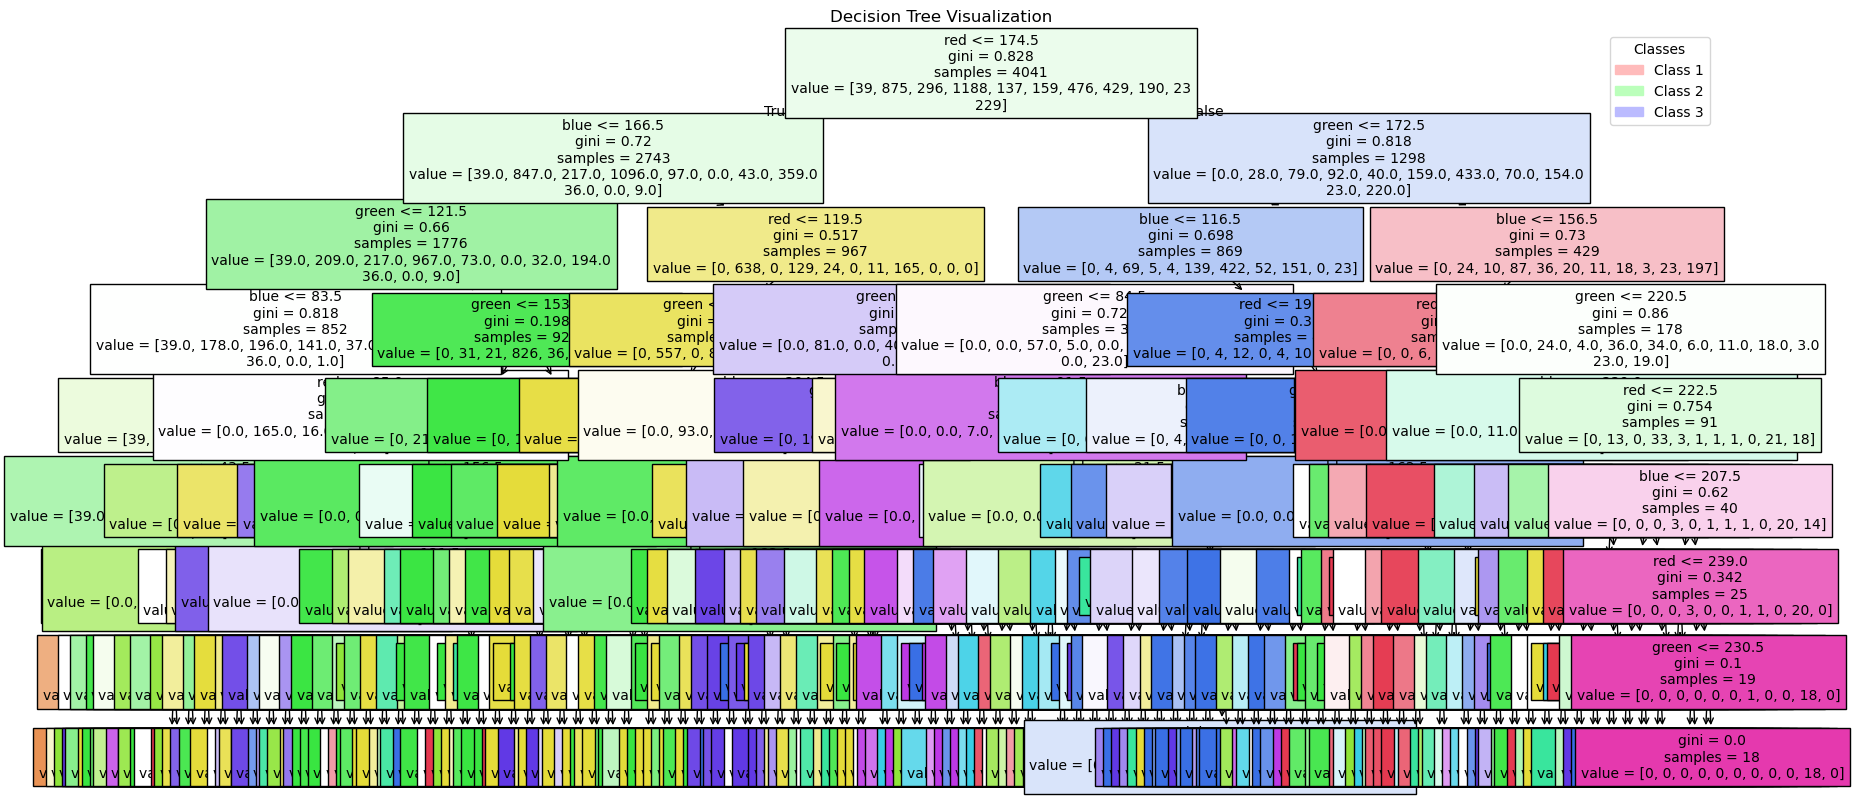

In [87]:
from sklearn.tree import plot_tree
import matplotlib.patches as mpatches

# Set up the figure
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    fontsize=10
)

legend_labels = [
    mpatches.Patch(color='#FFBBBB', label='Class 1'),
    mpatches.Patch(color='#BBFFBB', label='Class 2'),
    mpatches.Patch(color='#BBBBFF', label='Class 3')
]

plt.legend(handles=legend_labels, title='Classes')

plt.title("Decision Tree Visualization")
plt.show()

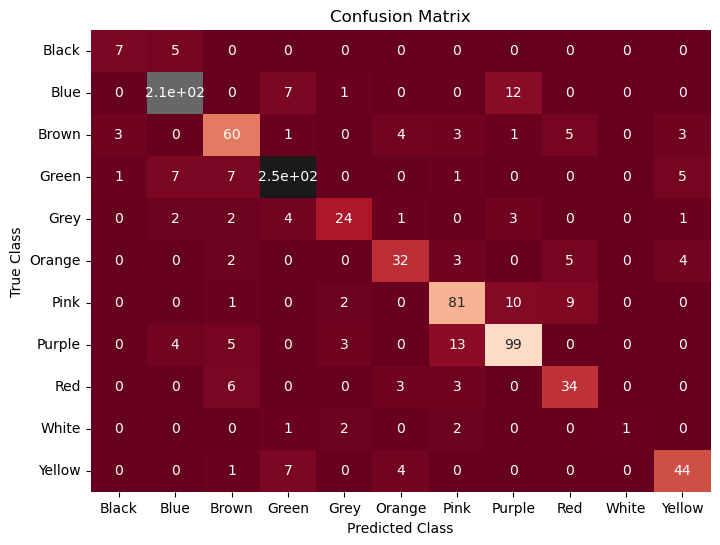

In [85]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the matrix
mat = confusion_matrix(y_test,y_pred)

# Plot the matrix
plt.figure(figsize=(8,6))
sns.heatmap(mat, annot=True, cmap="RdGy", xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
